In [1]:
import requests
from scipy import stats
import pandas as pd

In [2]:
IEX_CLOUD_API_TOKEN = 'Tpk_621626e278f34ee9b6a58f1441efca27' 

In [3]:
symbol = 'AAPL'
app_url = f'https://sandbox.iexapis.com/stable/stock/{symbol}/quote?token={IEX_CLOUD_API_TOKEN}'
data = requests.get(app_url).json()
print(data)

{'symbol': 'AAPL', 'companyName': 'Apple Inc', 'primaryExchange': 'A NBLE(TAGSCDMKSQOL EA LRGTES/)NA', 'calculationPrice': 'iexlasttrade', 'open': None, 'openTime': None, 'openSource': 'aioicffl', 'close': None, 'closeTime': None, 'closeSource': 'cfoaflii', 'high': None, 'highTime': None, 'highSource': None, 'low': None, 'lowTime': None, 'lowSource': None, 'latestPrice': 123.39, 'latestSource': 'IEX Last Trade', 'latestTime': 'December 10, 2020', 'latestUpdate': 1608885698182, 'latestVolume': None, 'iexRealtimePrice': 126.99, 'iexRealtimeSize': 14, 'iexLastUpdated': 1630811886388, 'delayedPrice': None, 'delayedPriceTime': None, 'oddLotDelayedPrice': None, 'oddLotDelayedPriceTime': None, 'extendedPrice': None, 'extendedChange': None, 'extendedChangePercent': None, 'extendedPriceTime': None, 'previousClose': 122.53, 'previousVolume': 115987781, 'change': 1.6, 'changePercent': 0.01284, 'volume': None, 'iexMarketPercent': 0.010862694202249012, 'iexVolume': 885219, 'avgTotalVolume': 9480039

In [30]:
collectionType = 'Technology'
app_2_url = f'https://cloud.iexapis.com/stable/stock/{symbol}/market/collection?token={IEX_CLOUD_API_TOKEN}'

In [31]:
data_2 = requests.get(app_2_url)
print(data_2)

<Response [403]>


In [32]:
from pandas_datareader import data as web

In [33]:
df = web.get_quote_yahoo('AAPL')

In [38]:
df

,language,region,quoteType,quoteSourceName,triggerable,epsTrailingTwelveMonths,epsForward,epsCurrentYear,priceEpsCurrentYear,sharesOutstanding,...,fiftyTwoWeekHigh,dividendDate,earningsTimestamp,earningsTimestampStart,earningsTimestampEnd,trailingAnnualDividendRate,trailingPE,trailingAnnualDividendYield,displayName,price
AAPL,en-US,US,EQUITY,Nasdaq Real Time Price,True,3.28,4.33,3.96,31.40909,17102499840,...,137.98,1605139200,1603989000,1611658740,1612180800,0.795,37.92073,0.006424,Apple,124.38


In [39]:
import yfinance as yf

In [216]:
stock = yf.Ticker('SQ')

In [217]:
stock.info['sector']

'Technology'

In [218]:
stock.info

{'zip': '94103',
 'sector': 'Technology',
 'fullTimeEmployees': 3835,
 'longBusinessSummary': "Square, Inc. provides, together with its subsidiaries, payment and point-of-sale solutions in the United States and internationally. The company's commerce ecosystem includes point-of-sale software and hardware that offers sellers to payment and point-of-sale solutions. It provides hardware products, including Magstripe reader, which enables swiped transactions of magnetic stripe cards; Contactless and chip reader that accepts Europay, MasterCard, and Visa (EMV) chip cards and Near Field Communication payments; Square Stand, which enables an iPad to be used as a payment terminal or full point of sale solution; Square Register that combines its hardware, point-of-sale software, and payments technology; Square Terminal, a portable payments device that replaces keypad terminals, which accepts various payment types, such as tap, dip, and swipe, as well as prints receipts; and managed payments sol

In [6]:
stocks = pd.read_csv('portfolio.csv')

In [7]:
stocks['Ticker'].values

array(['AC.TO', 'TGT', 'MXL', 'AMD', 'LYFT', 'DELL', 'PBW', 'RNW.TO',
       'BIDU', 'DPW', 'ABCB', 'XBC.V', 'PYPL', 'PG', 'MSFT', 'CLDR',
       'LTHM', 'NLOK', 'SQ'], dtype=object)

In [8]:
# Function sourced from 
# https://stackoverflow.com/questions/312443/how-do-you-split-a-list-into-evenly-sized-chunks
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]   
        
symbol_groups = list(chunks(stocks['Ticker'], 100))
symbol_strings = []
for i in range(0, len(symbol_groups)):
    symbol_strings.append(','.join(symbol_groups[i]))

columns = [
    'Ticker',
    'Sector',
    'Current Price',
    'Average Purchase Price Per Share',
    'Total Number of Shares',
    'Total Cost',
    'Current Value',
    'Dollar Return',
    'Percent Return'
    'Capital Gain/Loss'
]

In [10]:
import numpy as np
import yfinance as yf
portfolio_df = pd.DataFrame(columns=columns)

for symbol_string in symbol_strings:
    batch_api_call_url = f'https://sandbox.iexapis.com/stable/stock/market/batch?symbols={symbol_string}&types=quote,advanced-stats&token={IEX_CLOUD_API_TOKEN}'
    data = requests.get(batch_api_call_url).json()
    for symbol in symbol_string.split(','):
        try:
            stock = yf.Ticker(symbol)
            try:
                latestPrice = data[symbol]['quote']['latestPrice']
            except TypeError:
                latestPrice = np.NaN
            try:
                sector = stock.info['sector']
            except:
                sector = np.NaN
            portfolio_df = portfolio_df.append(
                pd.Series(
                [
                    symbol,
                    sector,
                    latestPrice,
                    0.0,
                    0,
                    0.0,
                    0.0,
                    0.0,
                    0.0
                ],
                index = columns),
                ignore_index = True
                )
        except KeyError:
            pass

In [11]:
portfolio_df

,Ticker,Sector,Current Price,Average Purchase Price Per Share,Total Number of Shares,Total Cost,Current Value,Dollar Return,Percent ReturnCapital Gain/Loss
0,TGT,Consumer Defensive,177.700,0.0,0,0.0,0.0,0.0,0.0
1,MXL,Technology,32.250,0.0,0,0.0,0.0,0.0,0.0
2,AMD,Technology,94.960,0.0,0,0.0,0.0,0.0,0.0
3,LYFT,Technology,49.290,0.0,0,0.0,0.0,0.0,0.0
4,DELL,Technology,72.430,0.0,0,0.0,0.0,0.0,0.0
5,PBW,NaN,92.920,0.0,0,0.0,0.0,0.0,0.0
6,BIDU,Communication Services,163.560,0.0,0,0.0,0.0,0.0,0.0
7,DPW,Industrials,4.240,0.0,0,0.0,0.0,0.0,0.0
8,ABCB,Financial Services,39.240,0.0,0,0.0,0.0,0.0,0.0
9,PYPL,Financial Services,216.300,0.0,0,0.0,0.0,0.0,0.0


In [206]:
portfolio_df = portfolio_df.set_index('Ticker')
portfolio_df

,Sector,Current Price,Average Purchase Price Per Share,Total Number of Shares,Total Cost,Current Value,Dollar Return,Percent Return
Ticker,,,,,,,,
AMD,Technology,94.39,0.0,0,0.0,0.0,0.0,0.0
CLDR,Technology,12.70,0.0,0,0.0,0.0,0.0,0.0
DELL,Technology,73.14,0.0,0,0.0,0.0,0.0,0.0
PBW,NaN,98.00,0.0,0,0.0,0.0,0.0,0.0
PYPL,Financial Services,225.44,0.0,0,0.0,0.0,0.0,0.0
SQ,Technology,218.77,0.0,0,0.0,0.0,0.0,0.0


In [207]:
portfolio_df.to_csv('portfolio.csv')

In [120]:
buy_price = input("Enter the purchase price of your stock:")
try:
    val_price = float(buy_price) 
except ValueError:
    print("That's not a number! \nPlease try again: ")
    buy_price = input("Enter the purchase price of your stock:")
    val_price = float(buy_price)

Enter the purchase price of your stock: 83.3767


In [121]:
number_of_shares = input("Enter the number of shares bought:")
try:
    val_shares = int(number_of_shares) 
except ValueError:
    print("That's not a integer! \nPlease try again: ")
    number_of_shares = input("Enter the number of shares bought:")
    val = float(number_of_shares)

Enter the number of shares bought: 2


In [122]:
import math
for ticker in portfolio_df.index:
    portfolio_df.loc[ticker,"Average Purchase Price Per Share"] = ((portfolio_df.loc[ticker,"Average Purchase Price Per Share"] * portfolio_df.loc[ticker,"Total Number of Shares"]) + 
                                                                    (val_price * val_shares))/ (portfolio_df.loc[ticker,"Total Number of Shares"] + val_shares)
    portfolio_df.loc[ticker,"Total Number of Shares"] += val_shares
    portfolio_df.loc[ticker,"Total Cost"] += val_price * val_shares
    portfolio_df.loc[ticker,"Current Value"] = portfolio_df.loc[ticker,"Total Number of Shares"] * portfolio_df.loc[ticker,"Current Price"]
    portfolio_df.loc[ticker,"Dollar Return"] = portfolio_df.loc[ticker,"Current Value"] - portfolio_df.loc[ticker,"Total Cost"]
    portfolio_df.loc[ticker,"Percent Return"] = round((portfolio_df.loc[ticker,"Dollar Return"] / portfolio_df.loc[ticker,"Total Cost"])*100,2)
portfolio_df

,Sector,Current Price,Average Purchase Price Per Share,Total Number of Shares,Total Cost,Current Value,Dollar Return,Percent Return
Ticker,,,,,,,,
AMD,Technology,94.94,84.871914,7,594.1034,664.58,70.4766,11.86
CLDR,Technology,12.87,84.871914,7,594.1034,90.09,-504.0134,-84.84
DELL,Technology,72.63,84.871914,7,594.1034,508.41,-85.6934,-14.42
PBW,NaN,96.48,84.871914,7,594.1034,675.36,81.2566,13.68
PYPL,Financial Services,223.50,84.871914,7,594.1034,1564.50,970.3966,163.34
SQ,Technology,216.52,84.871914,7,594.1034,1515.64,921.5366,155.11


In [170]:
list(portfolio_df['Sector'].unique())

['Technology', nan, 'Financial Services']

In [168]:
portfolio_df.fillna('Unknown').groupby(by=["Sector"])['Current Value'].sum()

Sector
Financial Services    1564.50
Technology            2778.72
Unknown                675.36
Name: Current Value, dtype: float64

In [145]:
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

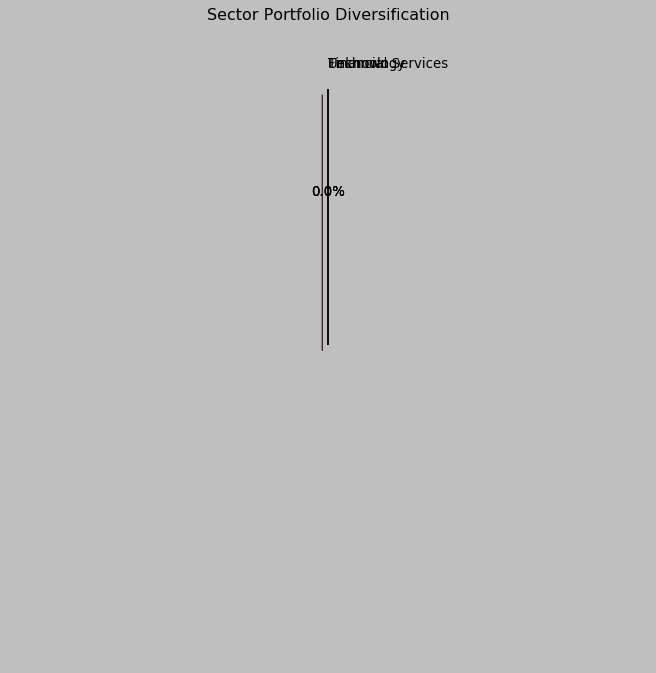

In [225]:
import matplotlib.pyplot as plt
plt.style.use('classic')
###Visualization of Portfolio
slices = portfolio_df.fillna('Unknown').groupby(by=["Sector"])['Current Value'].sum()
labels = sorted(list(portfolio_df['Sector'].fillna('Unknown').astype('str').unique()))
title = 'Sector Portfolio Diversification'

fig, ax = plt.subplots(figsize= (20,10))
ax.pie(slices, labels=labels, shadow=True, startangle=90,autopct='%1.1f%%')
ax.set_title(title);

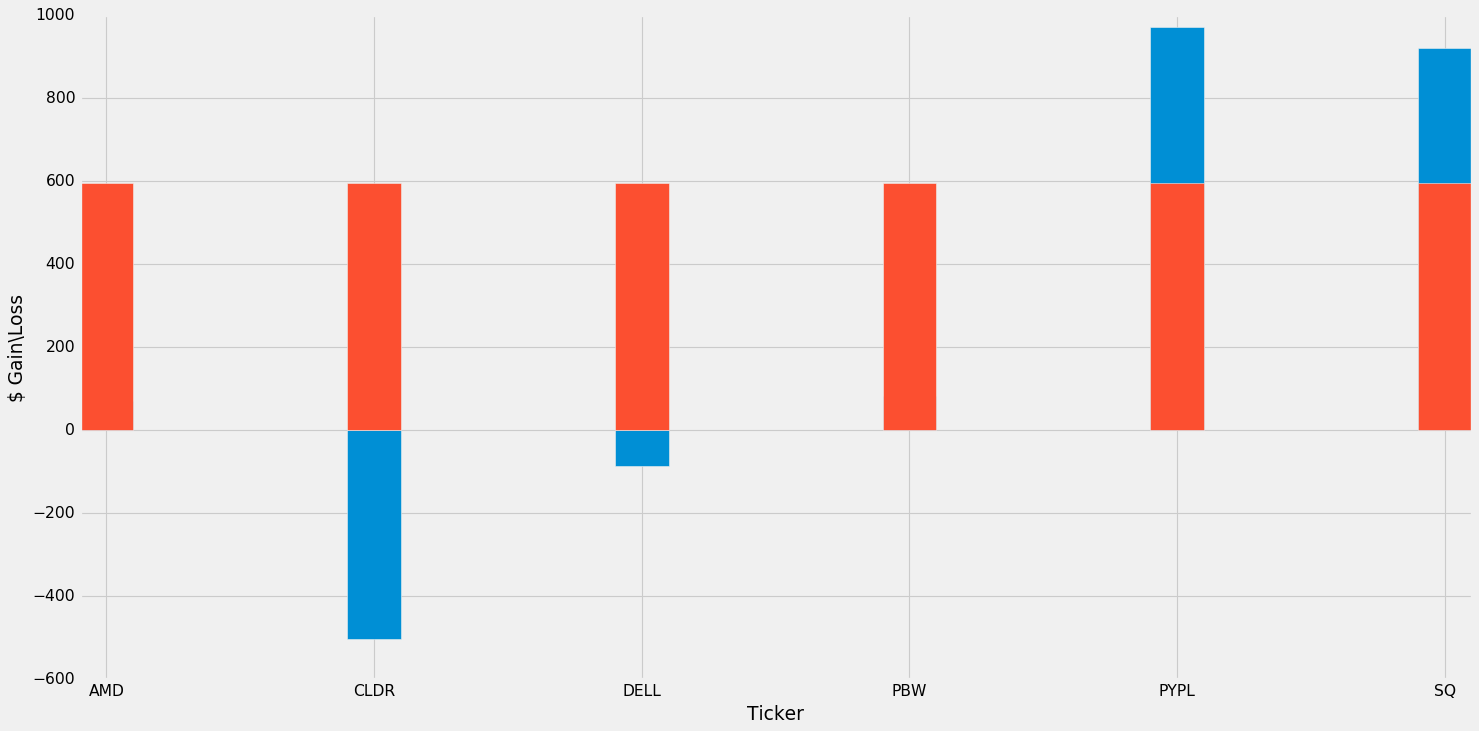

In [195]:
fig, ax = plt.subplots(figsize = (20,10))
labels = portfolio_df.index
total_gain_loss = portfolio_df['Dollar Return']
cost = portfolio_df['Total Cost']

ax.bar(labels,total_gain_loss,width=0.2,align='center',label='Total Gain/Loss')
ax.bar(labels,cost,0.2,align='center',label='Cost')
ax.set_xlabel('Ticker')
ax.set_ylabel('$ Gain\Loss');

In [223]:
df__ = pd.read_csv('portfolio.csv')

In [224]:
df__

,Ticker,Sector,Current Price,Average Purchase Price Per Share,Total Number of Shares,Total Cost,Current Value,Dollar Return,Percent Return,Capital Gain/Loss
0,AMD,Technology,95.73,84.871914,7,594.1034,681.59,87.4866,14.725820,0.0
1,CLDR,Technology,12.79,12.858400,20,257.1680,256.00,-1.1680,-0.454178,0.0
2,LYFT,Technology,48.49,43.538900,5,217.6945,233.80,16.1055,7.398212,0.0
3,DELL,Technology,71.89,70.896700,20,1417.9340,1464.00,46.0660,3.248811,0.0
4,PBW,NaN,97.68,87.020909,11,957.2300,1043.68,86.4500,9.031267,0.0
5,PYPL,Financial Services,218.10,216.062400,3,648.1872,656.37,8.1828,1.262413,0.0
6,SQ,Technology,215.72,204.193667,9,1837.7430,1953.99,116.2470,6.325531,0.0
7,XBC.V,Industrials,6.84,6.702500,12,80.4300,82.08,1.6500,2.051473,2.0
8,LTHM,NaN,0.00,0.000000,0,0.0000,0.00,0.0000,0.000000,0.0


In [210]:
df__ =df__.set_index('Ticker')
df__

,Sector,Current Price,Average Purchase Price Per Share,Total Number of Shares,Total Cost,Current Value,Dollar Return,Percent Return
Ticker,,,,,,,,
AMD,Technology,94.39,0.0,0,0.0,0.0,0.0,0.0
CLDR,Technology,12.70,0.0,0,0.0,0.0,0.0,0.0
DELL,Technology,73.14,0.0,0,0.0,0.0,0.0,0.0
PBW,NaN,98.00,0.0,0,0.0,0.0,0.0,0.0
PYPL,Financial Services,225.44,0.0,0,0.0,0.0,0.0,0.0
SQ,Technology,218.77,0.0,0,0.0,0.0,0.0,0.0


In [212]:
df__.loc[ticker,"Average Purchase Price Per Share"]

0.0

In [1]:
import pandas as pd
df = pd.read_csv('portfolio.csv')

In [2]:
open_df = df[df['Current Value']!= 0]

In [9]:
open_df.head(30)

,Ticker,Current Price,Average Purchase Price Per Share,Total Number of Shares,Total Cost,Current Value,Dividend,Dollar Return,Percent Return,Sector
1,SU,19.03,17.310000,3,51.93000,58.50,0.0,6.57000,0.126516,Energy
3,SQ,221.36,209.490440,6,1256.94264,1360.02,0.0,103.07736,0.082006,Technology
7,BIDU,162.38,153.559900,5,767.79950,808.60,0.0,40.80050,0.053140,Communication Services
8,LYFT,48.76,44.922071,7,314.45450,326.55,0.0,12.09550,0.038465,Technology
9,DELL,72.88,70.896700,20,1417.93400,1442.80,0.0,24.86600,0.017537,Technology
16,ABCB,38.66,37.569400,25,939.23500,938.50,0.0,-0.73500,-0.000783,Financial Services
17,XBC.V,7.10,6.819412,17,115.93000,113.90,0.0,-2.03000,-0.017511,Industrials
22,CLDR,12.31,12.681733,30,380.45200,361.80,0.0,-18.65200,-0.049026,Technology
23,LTHM,17.06,17.020000,30,510.60000,485.40,0.0,-25.20000,-0.049354,Basic Materials


In [4]:
open_df.to_csv("open-position.csv", index=0)

In [5]:
closed_df = df[df['Current Value'] == 0.0][['Ticker','Current Price','Dollar Return','Percent Return', 'Sector']]

In [10]:
closed_df.head(30)

,Ticker,Current Price,Dollar Return,Percent Return,Sector
0,AC.TO,26.230,202.0000,0.317960,Industrials
2,TGT,175.810,145.0960,0.091049,Consumer Defensive
4,CSCO,45.030,11.3675,0.058208,Technology
5,MXL,31.090,8.0684,0.056371,Technology
6,AMD,94.425,31.6385,0.053254,Technology
10,PBW,90.660,16.1050,0.016825,NaN
11,RNW.TO,18.250,0.1900,0.010771,Utilities
12,CLX,202.130,2.7960,0.006813,Consumer Defensive
13,CCS,44.740,0.1850,0.004292,Consumer Cyclical
14,K,63.330,0.7530,0.003869,Consumer Defensive


In [11]:
closed_df.to_csv('closed-position.csv',index=0)

In [12]:
len( df[df['Current Value'] == 0.0].index)

18

In [20]:
DF = pd.read_csv('open-position.csv')

In [21]:
DF = DF[DF['Current Value']!=0]

In [22]:
DF

,Ticker,Current Price,Average Purchase Price Per Share,Total Number of Shares,Total Cost,Current Value,Dividend,Dollar Return,Percent Return,Sector
0,SQ,220.50,209.490440,6.0,1256.94264,1360.02,0.0,103.07736,0.082006,Technology
1,BIDU,164.80,153.559900,5.0,767.79950,808.60,0.0,40.80050,0.053140,Communication Services
2,LYFT,47.66,44.922071,7.0,314.45450,326.55,0.0,12.09550,0.038465,Technology
3,DELL,74.71,70.896700,20.0,1417.93400,1442.80,0.0,24.86600,0.017537,Technology
4,ABCB,38.49,37.569400,25.0,939.23500,938.50,0.0,-0.73500,-0.000783,Financial Services
5,CLDR,12.34,12.681733,30.0,380.45200,361.80,0.0,-18.65200,-0.049026,Technology
6,LTHM,16.71,17.020000,30.0,510.60000,485.40,0.0,-25.20000,-0.049354,Basic Materials
